In [1]:
import os,sys
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# --- sedflow ---
from sedflow import train as Train

# --- provabgs ---
from provabgs import infer as Infer
from provabgs import models as Models

/home/chhahn/projects/provabgs/src/provabgs/models.py:23: UserWarning: import error with fsps; only use emulators
  warnings.warn('import error with fsps; only use emulators')


In [2]:
# SPS parameter priors
prior_sps = Infer.load_priors([
    Infer.UniformPrior(7., 12.5, label='sed'),
    Infer.FlatDirichletPrior(4, label='sed'),           # flat dirichilet priors
    Infer.UniformPrior(0., 1., label='sed'),            # burst fraction
    Infer.UniformPrior(1e-2, 13.27, label='sed'),       # tburst
    Infer.LogUniformPrior(4.5e-5, 1.5e-2, label='sed'), # log uniform priors on ZH coeff
    Infer.LogUniformPrior(4.5e-5, 1.5e-2, label='sed'), # log uniform priors on ZH coeff
    Infer.UniformPrior(0., 3., label='sed'),            # uniform priors on dust1
    Infer.UniformPrior(0., 3., label='sed'),            # uniform priors on dust2
    Infer.UniformPrior(-2., 1., label='sed')            # uniform priors on dust_index
])

In [3]:
m_sps = Models.NMF(burst=True, emulator=True)

input parameters : logmstar, beta1_sfh, beta2_sfh, beta3_sfh, beta4_sfh, fburst, tburst, gamma1_zh, gamma2_zh, dust1, dust2, dust_index


# read in samples from $p(\theta | \{ x_i\})$

In [4]:
dat_dir = '/scratch/network/chhahn/sedflow/'
thetas = np.load(os.path.join(dat_dir, 'nsa_sedflow.posterior_combined.npy'))
zreds = thetas[:,-1]
thetas = thetas[:,:-1]
thetas[:,6] = 10**thetas[:,6]
thetas[:,7] = 10**thetas[:,7]

In [6]:
nsa_filters = Train.photometry_bands()

In [7]:
thetas_sps = prior_sps.transform(thetas)

maggies = []
for theta_sps, zred in zip(thetas_sps, zreds): 
    # sample redshift
    try: 
        w, f = m_sps.sed(theta_sps, zred)
    except AssertionError: 
        print(theta_sps)
        continue
    
    _maggies = Train.SED_to_maggies(w, f, filters=nsa_filters)
    maggies.append(np.asarray(np.array(_maggies)[0].tolist()) * 1e9)
maggies = np.array(maggies)

[1.07664452e+01 2.22991824e-01 4.47095513e-01 1.61810696e-01
 1.68101996e-01 1.98793352e-01 9.96807671e+00 4.45261721e-05
 1.02716185e-04 1.63094592e+00 1.22037005e+00 8.56531203e-01]
[ 1.10037642e+01  3.84223700e-01  5.64332843e-01  4.81033847e-02
  3.34009947e-03  2.91181862e-01  6.92973042e+00  4.27710838e-05
  2.75943079e-04  5.29175937e-01  9.29154873e-01 -5.94532549e-01]
[9.90307236e+00 8.99646223e-01 5.51489592e-02 2.04347558e-02
 2.47700661e-02 6.27151966e-01 1.00197554e+01 4.44213838e-05
 2.89297686e-03 1.06778753e+00 1.83188319e-02 2.88512141e-01]
[1.10150728e+01 2.96809673e-01 5.58460295e-01 3.90064828e-02
 1.05723530e-01 7.12722182e-01 8.64231586e+00 4.34448229e-05
 1.04307102e-04 2.58161306e+00 1.47385025e+00 7.88402855e-02]
[ 1.10260878e+01  2.83612549e-01  5.98981500e-01  7.27021396e-02
  4.47038040e-02  3.61849427e-01  3.93028760e+00  4.17814590e-05
  1.74958361e-04  2.16746998e+00  1.08653069e+00 -5.32114148e-01]
[9.53198242e+00 7.83733130e-01 1.94365457e-02 1.35603443

/home/chhahn/projects/provabgs/src/provabgs/models.py:496: UserWarning: tburst > 13.27 Gyr returns 0s --- modify priors
  warnings.warn('tburst > 13.27 Gyr returns 0s --- modify priors')


[1.00189352e+01 5.26666939e-01 4.25023496e-01 1.04682902e-02
 3.78412791e-02 6.71940207e-01 1.02075920e+01 4.27759187e-05
 1.27224391e-03 2.10993624e+00 3.78224403e-01 3.64194334e-01]
[1.05992956e+01 4.62197483e-01 1.67689711e-01 2.46279627e-01
 1.23833179e-01 3.34621847e-01 5.84266281e+00 4.44273828e-05
 1.22559635e-04 2.86076784e-01 9.58620906e-01 5.93886554e-01]
[9.62024403e+00 8.17403376e-01 1.64358228e-01 3.69665236e-03
 1.45417377e-02 5.74377239e-01 5.02106762e+00 3.54370495e-05
 1.39854627e-03 1.51210892e+00 5.65985799e-01 8.92710328e-01]
[1.08265810e+01 4.30741012e-01 3.51653278e-01 1.29009783e-01
 8.85959119e-02 9.08398151e-01 1.04155045e+01 4.43144563e-05
 8.31674406e-05 1.27285790e+00 1.64227390e+00 2.05341086e-01]
[ 1.12258873e+01  2.71947563e-01  5.60476542e-01  8.77008587e-02
  7.98750669e-02  3.52616638e-01  4.28605175e+00  4.21021068e-05
  9.26704670e-05  1.45449471e+00  8.78823042e-01 -8.05227160e-01]
[ 1.07015381e+01  6.54196620e-01  7.47706369e-03  1.75886065e-01
  1

In [8]:
mags = Train.flux2mag(maggies)

In [9]:
from sedflow import obs as Obs

In [10]:
y_nsa = Obs.load_nsa_data(test_set=False)
mags_nsa = y_nsa[:,:5]

In [11]:
maggies_nsa = Train.mag2flux(mags_nsa)

In [12]:
import corner as DFM

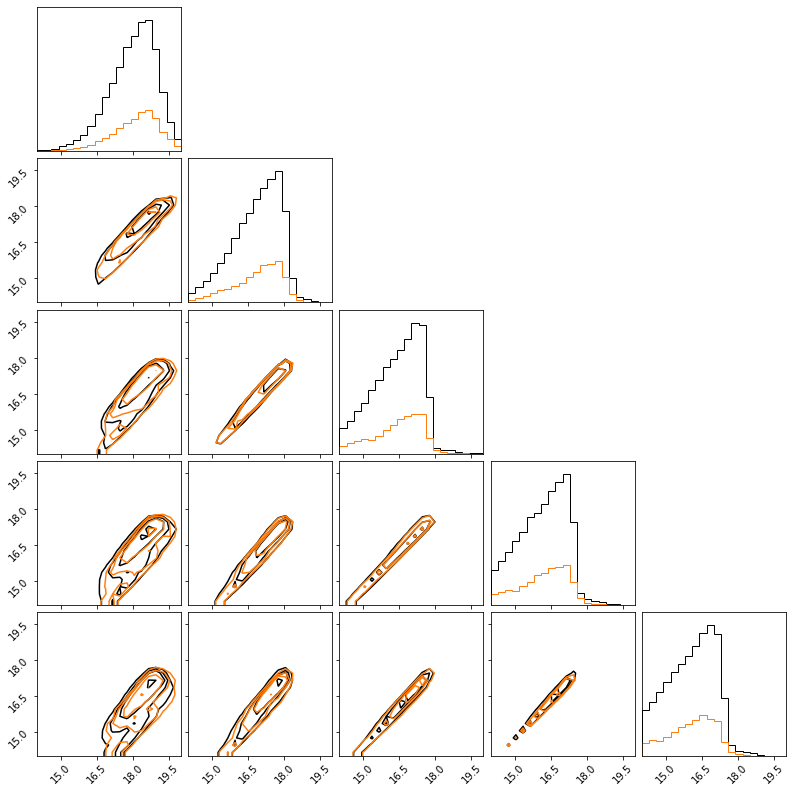

In [13]:
fig = DFM.corner(mags_nsa, range=[(14,20) for i in range(5)], 
                 plot_density=False, plot_datapoints=False)
_ = DFM.corner(mags, fig=fig, range=[(14,20) for i in range(5)], 
               color='C1', plot_density=False, plot_datapoints=False)

In [14]:
np.save(os.path.join(dat_dir, 'nsa_sedflow.posterior_combined.nanomaggies.npy'), maggies)